<a href="https://colab.research.google.com/github/vishalsinglagithub/EV-DATASET-ANALYSIS/blob/main/EV_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: upload exel file on colab

from google.colab import files
uploaded = files.upload()

Saving ev.csv to ev.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("ev.csv")

print("Data Loaded. Shape:", df.shape)
df.head()


Data Loaded. Shape: (5000, 17)


,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [4]:

print("Data Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nMain Columns Description:")
print(df.describe(include='all'))


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13  Renewab

# **Dataset Understanding**

In [5]:
 #Feature Engineering
# Extract city from address
df["City"] = df["Address"].apply(lambda x: x.split(",")[-2].strip() if "," in x else "Unknown")
df.head()

# One-hot encode connector types
connector_df = df["Connector Types"].str.get_dummies(sep=", ")
print("Top Connector Types:")
print(connector_df.sum().sort_values(ascending=False))

# Maintenance frequency vs. reviews
print("\nAverage Review by Maintenance Frequency:")
print(df.groupby("Maintenance Frequency")["Reviews (Rating)"].mean())



Top Connector Types:
CCS        1908
Type 2     1903
Tesla      1828
CHAdeMO    1808
dtype: int64

Average Review by Maintenance Frequency:
Maintenance Frequency
Annually     3.985940
Monthly      3.983075
Quarterly    4.015188
Name: Reviews (Rating), dtype: float64


In [6]:
# Display all columns and all rows of head
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Show the first 5 rows with all columns
df.head()


,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency,City
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually,City 98
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly,8970 San Francisco Ave
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually,5974 Bangkok Ave
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly,6995 Toronto Ave
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually,5704 Mumbai Ave


In [7]:
# STEP 6: Univariate EDA
print("Charger Type Distribution:")
print(df["Charger Type"].value_counts())

print("\nCharging Capacity Stats:")
print(df["Charging Capacity (kW)"].describe())

print("\nCost Distribution:")
print(df["Cost (USD/kWh)"].describe())

print("\nReview Ratings:")
print(df["Reviews (Rating)"].describe())



Charger Type Distribution:
Charger Type
AC Level 2         1764
AC Level 1         1638
DC Fast Charger    1598
Name: count, dtype: int64

Charging Capacity Stats:
count    5000.000000
mean      144.272000
std       128.370674
min        22.000000
25%        50.000000
50%       150.000000
75%       350.000000
max       350.000000
Name: Charging Capacity (kW), dtype: float64

Cost Distribution:
count    5000.000000
mean        0.300196
std         0.115733
min         0.100000
25%         0.200000
50%         0.300000
75%         0.400000
max         0.500000
Name: Cost (USD/kWh), dtype: float64

Review Ratings:
count    5000.000000
mean        3.994800
std         0.582667
min         3.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: Reviews (Rating), dtype: float64


In [8]:
# STEP 7: Bivariate & Multivariate EDA
print("Correlation Matrix:")
print(df.corr(numeric_only=True))

print("\nAvg Usage by Charger Type:")
print(df.groupby("Charger Type")["Usage Stats (avg users/day)"].mean())

print("\nAvg Usage by Year:")
print(df.groupby("Installation Year")["Usage Stats (avg users/day)"].mean())

print("\nCost by Operator:")
print(df.groupby("Station Operator")["Cost (USD/kWh)"].mean())

print("\nUsage by Availability:")
print(df.groupby("Availability")["Usage Stats (avg users/day)"].mean())

print("\nRenewable Energy Usage (%):")
print(df["Renewable Energy Source"].value_counts(normalize=True) * 100)



Correlation Matrix:
                             Latitude  Longitude  Cost (USD/kWh)  Distance to City (km)  Usage Stats (avg users/day)  Charging Capacity (kW)  Installation Year  Reviews (Rating)  Parking Spots
Latitude                     1.000000  -0.162188       -0.003026              -0.015068                     0.008427               -0.027862           0.000443         -0.009878      -0.007022
Longitude                   -0.162188   1.000000        0.043225              -0.008741                    -0.004006                0.011406          -0.004775          0.003831      -0.019968
Cost (USD/kWh)              -0.003026   0.043225        1.000000              -0.000350                    -0.032801                0.010217          -0.006443          0.000018      -0.001605
Distance to City (km)       -0.015068  -0.008741       -0.000350               1.000000                     0.017581                0.004207           0.022404          0.012661      -0.004210
Usage Stats (av

In [9]:
# STEP 8: Insights & Underserved Areas
# Cities with less than 3 stations
under_served = df["City"].value_counts()[df["City"].value_counts() < 3]
print("\nUnder-Served Cities (<3 stations):")
print(under_served)

# Peak year
peak_usage_year = df.groupby("Installation Year")["Usage Stats (avg users/day)"].mean().idxmax()
print("\nPeak Usage Year:", peak_usage_year)



Under-Served Cities (<3 stations):
City
City 221               2
City 76                2
City 355               2
144 Mexico City Ave    2
City 487               2
                      ..
9857 São Paulo Ave     1
6199 Berlin Ave        1
8471 Mumbai Ave        1
8576 Moscow Ave        1
6878 Seoul Ave         1
Name: count, Length: 4697, dtype: int64

Peak Usage Year: 2011


In [10]:
# STEP 8: Hidden Patterns
under_served = df['City'].value_counts()[df['City'].value_counts() < 3]
print("\nUnder-Served Cities (<3 stations):\n", under_served)



Under-Served Cities (<3 stations):
 City
City 221               2
City 76                2
City 355               2
144 Mexico City Ave    2
City 487               2
                      ..
9857 São Paulo Ave     1
6199 Berlin Ave        1
8471 Mumbai Ave        1
8576 Moscow Ave        1
6878 Seoul Ave         1
Name: count, Length: 4697, dtype: int64


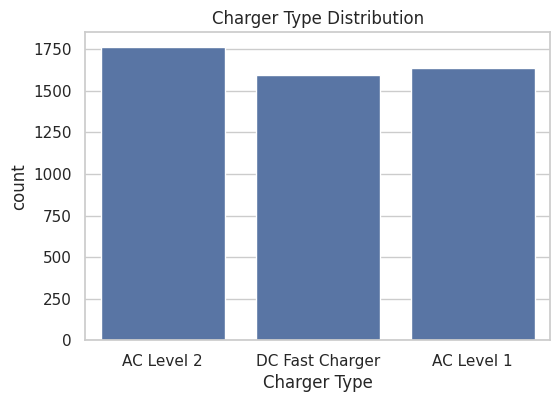

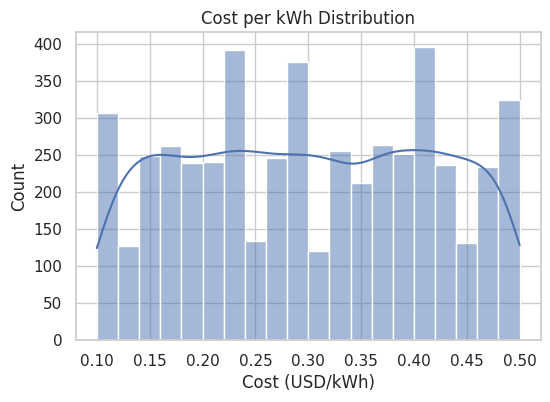

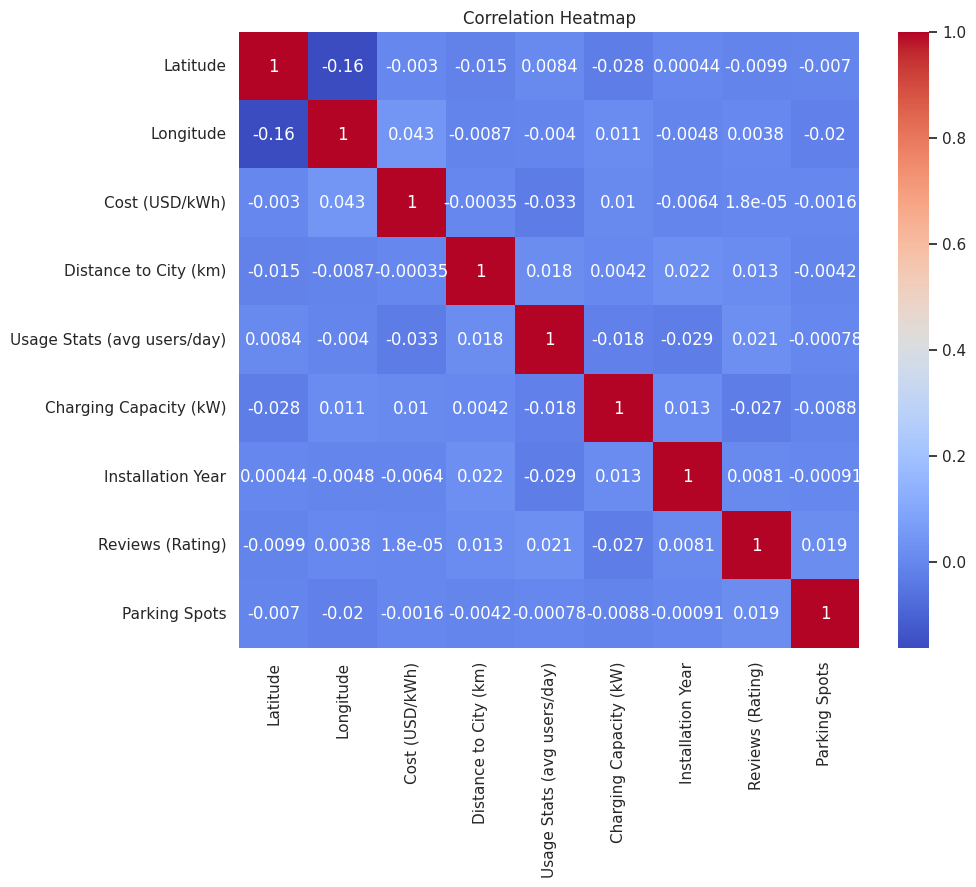

In [11]:
# STEP 9: Visualizations
sns.set(style="whitegrid")

# Charger Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Charger Type")
plt.title("Charger Type Distribution")
plt.show()

# Cost Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Cost (USD/kWh)"], bins=20, kde=True)
plt.title("Cost per kWh Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()





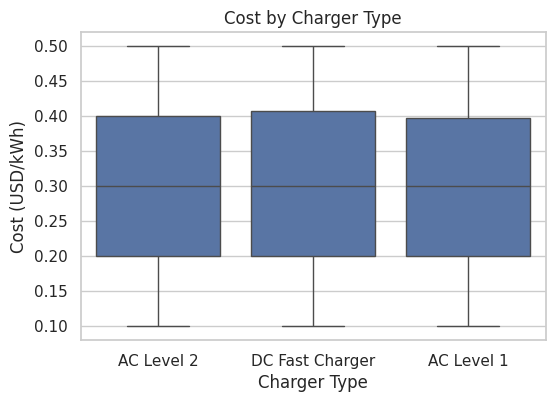

In [12]:
# Boxplot: Cost by Charger Type
plt.figure(figsize=(6,4))
sns.boxplot(x="Charger Type", y="Cost (USD/kWh)", data=df)
plt.title("Cost by Charger Type")
plt.show()


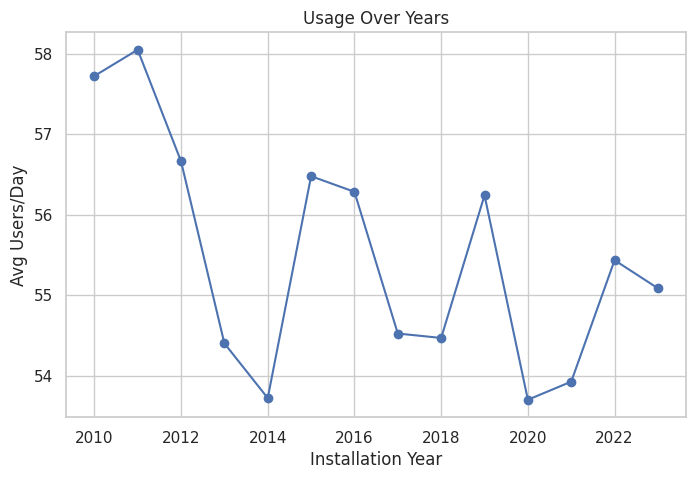

In [13]:
# Usage by Installation Year
plt.figure(figsize=(8,5))
df.groupby("Installation Year")["Usage Stats (avg users/day)"].mean().plot(marker='o')
plt.title("Usage Over Years")
plt.xlabel("Installation Year")
plt.ylabel("Avg Users/Day")
plt.grid(True)
plt.show()